### This is a file for taking a few images of real people and cropping them for use in models

In [28]:
%matplotlib inline
import numpy as np
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
import tensorflow as tf
from utils import transform #DCGAN
from utils import center_crop #DCGAN
import scipy

In [29]:
alexHQ=io.imread('custom_images/original/DimakisHighQuality.png')
sriramHQ=io.imread('custom_images/original/VishwanathHighQuality.jpg')

In [30]:
def crop_custom(img,tl,br,crop_w,show=True):
    '''
    The goal is to save centered cropped uint8 images
    
    How to use:
    Specify the image by setting it to img
    crop the image so it is centered with tl,br (topleft, bottomright)
    Then the middle sqaure region crop_w x crop_w is taken, and rescaled to 64x64
    '''
    centered_img=img[tl[0]:br[0],tl[1]:br[1]]
    out=center_crop(centered_img,crop_w,crop_w,64,64)
    
    if show:
        io.imshow_collection([img,out])
    return out

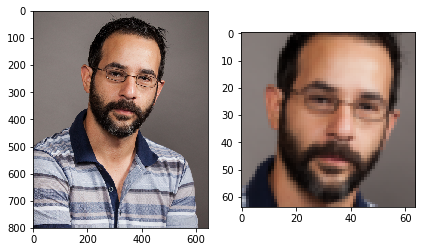

In [31]:
#ALEX PARAMS
save_path='custom_images/processed/Dimakis.png'
img=alexHQ
#center image
tl=[0,0];br=list(img.shape[:2])#init (dont touch)
br[0]=560
crop_w=400

out_img=crop_custom(img,tl,br,crop_w,show=True)
io.imsave(save_path,out_img)

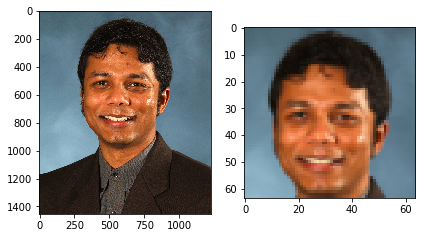

In [35]:
#SRIRAM PARAMS
save_path='custom_images/processed/Vishwanath.png'
img=sriramHQ
#center image
tl=[0,0];br=list(img.shape[:2])#init (dont touch)
br[0]=1000
crop_w=950

out_img=crop_custom(img,tl,br,crop_w,show=True)
io.imsave(save_path,out_img)

In [16]:
br[

800

In [17]:
br[1]=3

TypeError: 'tuple' object does not support item assignment

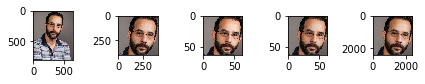

In [6]:
#custom_crop


#PARAMS
img=alexHQ
tl=[50,90]
w=400

br=[tl[0]+w,tl[1]+w]
crop=img[tl[0]:br[0],tl[1]:br[1]]
float_img64=resize(crop,[64,64],mode='reflect',preserve_range=True)
img64=float_img64.round().astype(np.uint8)
resca64=rescale(crop,w/64,mode='reflect')
#io.imshow(crop)
io.imshow_collection([img,crop,float_img64/float_img64.max(),img64,resca64])

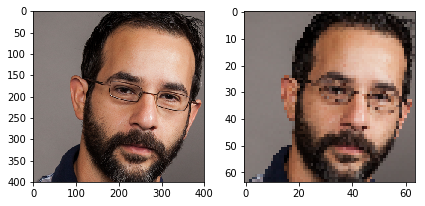

In [47]:
io.imshow_collection([crop,img64])

In [39]:
crop.shape

(400, 490, 3)

In [28]:
resize?

In [17]:
alexHQ.shape

(800, 643, 3)

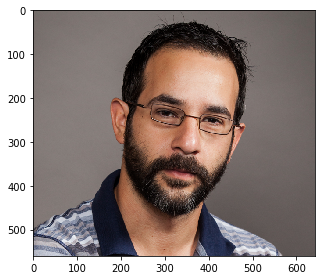

In [22]:
io.imshow(alexHQ[:560])

In [5]:
alex_sq=alexHQ[:560]

tl=[50,90]
w=400
img=alexHQ
br=[tl[0]+w,tl[1]+w]

dcout=center_crop(alex_sq,br[0]-tl[0],br[1]-tl[1],64,64)#scipy.misc.resize

In [14]:
crop_h,crop_w=br[0]-tl[0],br[1]-tl[1]

In [43]:
##There seems to be a difference between scipy imresize and tf.image.resize_images

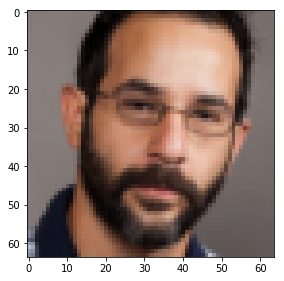

In [15]:
#DCGAN
dc_img=alex_sq
h, w = dc_img.shape[:2]
j = int(round((h - crop_h)/2.))
i = int(round((w - crop_w)/2.))
dc_crop=dc_img[j:j+crop_h, i:i+crop_w]
dc_img64=scipy.misc.imresize(dc_crop, [64, 64])
io.imshow(dc_img64)

In [64]:
#crop_w,crop_h=400,400
crop_w,crop_h=400,400

In [65]:
#BEGAN
s=tf.Session()
tf_bg_img=tf.constant(alex_sq)
f_bg_image=tf.cast(tf_bg_img,dtype=tf.float32)
#resize args:(image,target_height,target_width)
tf_bg_crop=tf.image.resize_image_with_crop_or_pad(f_bg_image,crop_h,crop_w)

#image=tf.image.resize_bilinear(image,[scale_size,scale_size])#must be 4D
tf_bg_img64=tf.image.resize_images(tf_bg_crop,[64,64],
        method=tf.image.ResizeMethod.BILINEAR)
tf_bg_final_image=tf.image.random_flip_left_right(tf_bg_img64)

bg_img,bg_crop,bg_img64,bg_final=s.run([tf_bg_img,tf_bg_crop,tf_bg_img64,tf_bg_final_image])

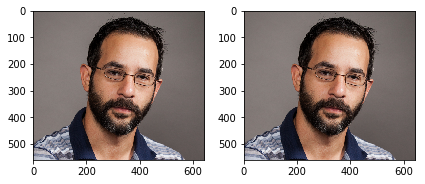

In [66]:
io.imshow_collection([dc_img,bg_img])

In [67]:
print 'dc:',dc_crop.dtype,'  bg:',bg_crop.dtype
print 'dc:',dc_crop.shape,'  bg:',bg_crop.shape

dc: uint8   bg: float32
dc: (400, 400, 3)   bg: (400, 400, 3)


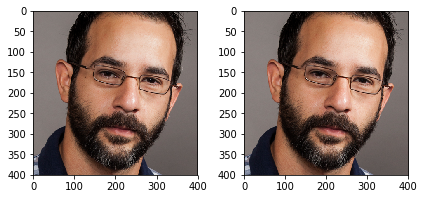

In [68]:
io.imshow_collection([dc_crop,bg_crop/bg_crop.max()])

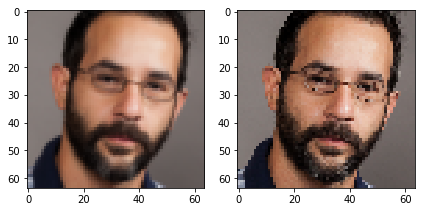

In [69]:
##The began tf.image.resize produces a lower res image somehow
#io.imshow_collection([dc_img64,bg_img64/bg_img64.max()])
io.imshow_collection([dc_img64,bg_img64/255.])

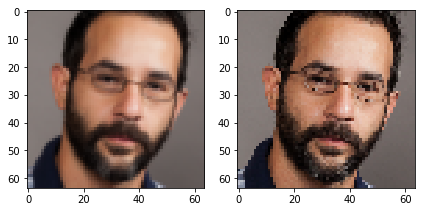

In [39]:
##The began tf.image.resize produces a lower res image somehow
#io.imshow_collection([dc_img64,bg_img64/bg_img64.max()])
io.imshow_collection([dc_img64,bg_img64/255.])

### <i>Explore different module resizing:</i>

In [70]:
same_crop=dc_crop#pickone, look about same#slight offset

In [101]:
scipy.misc.imresize?

In [103]:
def scresize1(im):
    return scipy.misc.imresize(im, [64, 64])
def scresize2(im):
    return scipy.misc.imresize(im, [64, 64],interp='nearest')
def scresize3(im):
    return scipy.misc.imresize(im, [64, 64],interp='lanczos')
def scresize4(im):
    return scipy.misc.imresize(im, [64, 64],interp='bilinear')
def scresize5(im):
    return scipy.misc.imresize(im, [64, 64],interp='bicubic')
def scresize6(im):
    return scipy.misc.imresize(im, [64, 64],interp='cubic')


In [115]:
scrz1=scresize1(same_crop)
scrz2=scresize2(same_crop).astype(np.uint8)
scrz3=scresize3(same_crop).astype(np.uint8)
scrz4=scresize4(same_crop).astype(np.uint8)
scrz5=scresize5(same_crop).astype(np.uint8)
scrz6=scresize6(same_crop).astype(np.uint8)

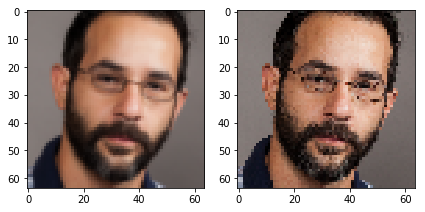

In [116]:
io.imshow_collection([scrz1,scrz2])

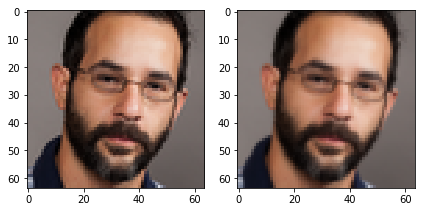

In [117]:
io.imshow_collection([scrz3,scrz4])

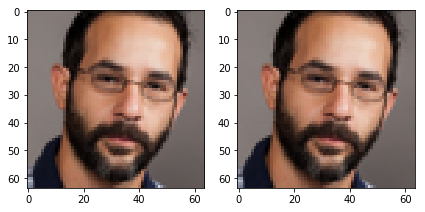

In [118]:
io.imshow_collection([scrz5,scrz6])

In [88]:
def resize1(im):
    return scipy.misc.imresize(im, [64, 64])

def resize2(im):
    tf_crop=tf.constant(im)
    tf_rz=tf.image.resize_images(tf_crop,[64,64],
        method=tf.image.ResizeMethod.BILINEAR)
    return s.run(tf_rz)

def resize3(im):
    tf_crop=tf.constant(im)
    tf_rz=tf.image.resize_images(tf_crop,[64,64],
        method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return s.run(tf_rz)

def resize4(im):
    tf_crop=tf.constant(im)
    tf_rz=tf.image.resize_images(tf_crop,[64,64],
        method=tf.image.ResizeMethod.BICUBIC)
    return s.run(tf_rz)

def resize5(im):
    tf_crop=tf.constant(im)
    tf_rz=tf.image.resize_images(tf_crop,[64,64],
        method=tf.image.ResizeMethod.AREA)
    return s.run(tf_rz)

In [105]:
rz1=resize1(same_crop)
rz2=resize2(same_crop).astype(np.uint8)
rz3=resize3(same_crop).astype(np.uint8)
rz4=resize4(same_crop).astype(np.uint8)
rz5=resize5(same_crop).astype(np.uint8)

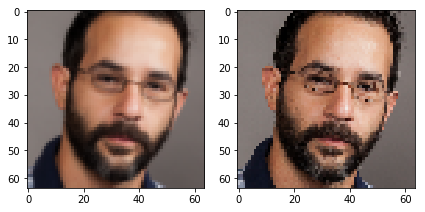

In [107]:
io.imshow_collection([rz1,rz2])

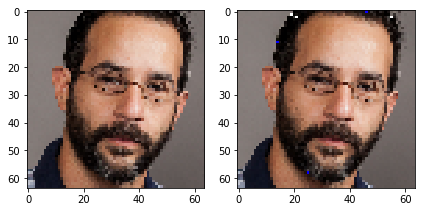

In [108]:
io.imshow_collection([rz3,rz4])

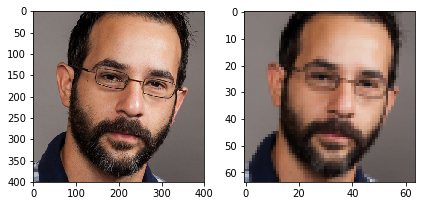

In [109]:
io.imshow_collection([same_crop,rz5])# Resize method:AREA

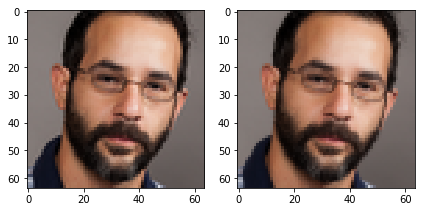

In [122]:
#scipy lacanzos vs tf area:
io.imshow_collection([scrz3,rz5])

### Conclusion: 
#### <l> scipy seems to do better for a variety of resize algorithms. tensorflow can do okay if it uses AREA 

##### Scratch

In [124]:
tf.__version__

'1.0.1'

In [123]:
tf.image.ResizeMethod.__dict__.keys()

['BILINEAR',
 '__module__',
 'AREA',
 '__dict__',
 'BICUBIC',
 'NEAREST_NEIGHBOR',
 '__weakref__',
 '__doc__']

In [120]:
getattr(tf.image.ResizeMethod,'BILINEAR')

0

In [121]:
getattr(tf.image.ResizeMethod,'AREA')

3

In [ ]:
# crop=img[tl[0]:br[0],tl[1]:br[1]]
# float_img64=resize(crop,[64,64],mode='reflect',preserve_range=True)
# img64=float_img64.round().astype(np.uint8)
# resca64=rescale(crop,w/64,mode='reflect')
# #io.imshow(crop)

# io.imshow_collection([img,crop,float_img64/float_img64.max(),img64,resca64])